# Workshop #5: Probability Distributions

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import scipy.stats as stats
import random

## Problem 1
A certain tennis player makes a successful first serve 70% of the time. Assume that each serve is independent of the others. If she serves 6 times, what is the probability she gets:
* all 6 serves in?
* exactly 4 serves in?
* at least 4 serves in?
* no more than 4 serves in?
* Make a bar graph to visualize the distribution

P(X = 6) = 0.11764899999999996
P(X = 4) = 0.3241349999999999
P(X >= 4) = 0.7443099999999999
P(X <= 4) = 0.579825


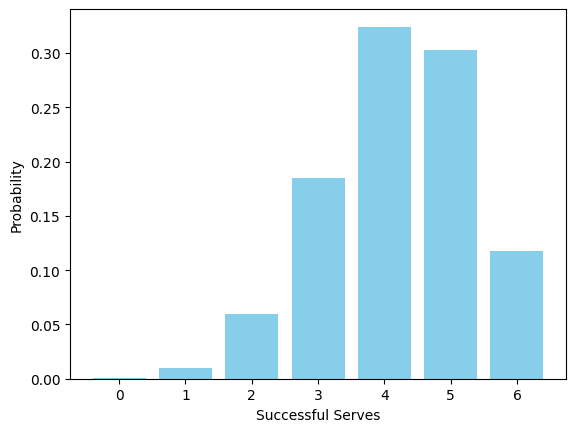

In [ ]:
n = 6
p = 0.7

x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)

#probability of all 6 serves in
P_X_6 = stats.binom.pmf(6, n, p)

#probability of 4 serves in
P_X_4 = stats.binom.pmf(4, n, p)

#probability of at least 4 serves in
P_X_geq_4 = stats.binom.cdf(6, n, p) - stats.binom.cdf(3, n, p)

#probability of no more than serves in
P_X_leq_4 = stats.binom.cdf(4, n, p)

print(f"P(X = 6) = {P_X_6}")
print(f"P(X = 4) = {P_X_4}")
print(f"P(X >= 4) = {P_X_geq_4}")
print(f"P(X <= 4) = {P_X_leq_4}")

#bar plot
plt.bar(x, pmf, color='skyblue')
plt.xlabel('Successful Serves')
plt.ylabel('Probability')
plt.xticks(x)
plt.show()

## Problem 2
A company produces computer microchips, which have a life expectancy that follows a normal distribution with a mean of 90 months and a standard deviation of 3.7 months.
* If a microchip is guaranteed to work for 84 months, find the probability that it will fail before the guarantee period ends.
* The probability that a microchip is working before the end of the guarantee period is required to be 99%. For how many months should it be guaranteed to work?
* A rival company produces microchips where the probability that they will fail after 84 months is 0.88. Given that the life expectancy also follows a normal distribution with standard deviation 3.7 months, find the mean life expectancy of these chips.

In [ ]:
mean = 90
std_dev = 3.7

#probability that a microchip fails before 84 months
guarantee_period = 84
P_fail_before_guarantee = stats.norm.cdf(guarantee_period, mean, std_dev)
print(f"P(x < 84): {P_fail_before_guarantee}")

#guarantee period for 99% probability that the chip will last
guarantee_period_99 = stats.norm.ppf(0.01, mean, std_dev)
print(f"P(X < x) = 0.99 for x: {guarantee_period_99}")

#probability of failure after 84 months is 0.88
P_fail_after_guarantee = 0.88
mean_rival = stats.norm.ppf(P_fail_after_guarantee, loc=84, scale=std_dev)
print(f"The mean life expectancy for the chips of the rival company is: {mean_rival}")

P(x < 84): 0.052442195093830156
P(X < x) = 0.99 for x: 81.39251286604889
The mean life expectancy for the chips of the rival company is: 88.34745113064453


## Problem 3
The speeds of cars at a certain point on a straight road are normally distributed with mean $\mu$ and standard deviation $\sigma$. 15% of the cars travelled at speeds greater than 90 km/h and 12% of them at speeds less than 40 km/h. Find $\mu$ and $\sigma$.

In [ ]:
#15% of cars travelled at speeds greater than 90 km/h
p1 = 0.85
#12% of cars travelled at speeds less than 40 km/h
p2 = 0.12

x1 = 90
x2 = 40

z1 = stats.norm.ppf(p1)
z2 = stats.norm.ppf(p2)

mu = (x1 * z2 - x2 * z1) / (z2 - z1)

sigma = (x1 - mu) / z1

print(f"Mean mu = {mu}")
print(f"St. dev sigma = {sigma}")

Mean mu = 66.56633962789658
St. dev sigma = 22.609904900447855


## Problem 4
This simulation involves rolling a fair six-sided die.

Let $X$ be the random variable which counts in what roll you get the first six. This could be, for example, in the first roll, in the third roll, or even the fiftieth roll (though this is highly unlikely. In other words: $X \in \{1, 2, 3,\ldots \}$. Design a simulation which estimates the probability distribution of the random variable $X$, i.e. estimates the probabilities $P(X=k)$. Note: limit your scope for k to the range $\{1, 2, \ldots, 50\}$ as greater values are anyhow highly unlikely.

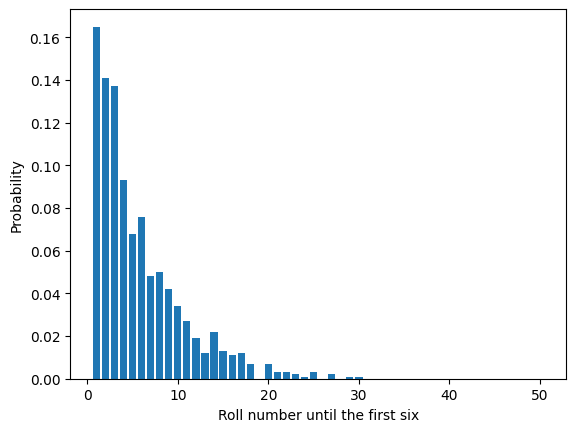

In [ ]:
num_simulations = 1000
max_k = 50

first_six_rolls = []

for _ in range(num_simulations):
    roll_count = 0
    while True:
        roll_count += 1
        if random.randint(1, 6) == 6:
            break
        if roll_count >= max_k:
            break
    first_six_rolls.append(min(roll_count, max_k))

counts = [first_six_rolls.count(k) for k in range(1, max_k + 1)]

probabilities = [count / num_simulations for count in counts]

#bar plot
plt.bar(range(1, max_k+1), probabilities)
plt.xlabel('Roll number until the first six')
plt.ylabel('Probability')
plt.show()